# Assignment 1 - Hactive8 Introduction to Python for Data Science


Nama            :   Jasmine Nur Ramadhani

Kelas           :   PYTN-KS20

Kode Peserta    :   PYTN-KS20-016


## Data for Project

Sumber data : https://www.kaggle.com/datasets/jboysen/london-crime?resource=download

Dataset yang digunakan berisikan rekam kejahatan di area metropolitan besar, seperti London.

This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import folium
from geopy.geocoders import Nominatim  # For Address --> lat & long
from time import sleep  # Add in delays


## About the Data

In [2]:
data_crime = pd.read_csv("dataset/london_crime_by_lsoa.csv")

In [3]:
# untuk mendapatkan panjang nilai di kolom dataframe
len(data_crime)

13490604

In [4]:
# Mengetahui jumlah baris dan kolom 
data_crime.shape

(13490604, 7)

In [5]:
# Untuk mengetahui dimensi 
data_crime.ndim

2

In [6]:
# Mengembalikan label setiap kolom dari dataframe
data_crime.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [7]:
# mengetahui unique values dari koom "borough"
data_crime.borough.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [8]:
data_crime.major_category.unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [9]:
data_crime.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [10]:
data_crime.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### Displaying Data Type

In [11]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Basic Statistics

In [12]:
data_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [13]:
data_crime.describe(include=["O"])      

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


### Detail About Dataset

In [14]:
# Banyaknya kasus kejahatan yang terjadi berdasarkan "major_category"
data_crime["major_category"].value_counts()

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: count, dtype: int64

In [15]:
# Banyaknya kasus kejahatan yang terjadi berdasarkan "borough"
data_crime["borough"].value_counts()

borough
Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Ke

### Check for any missing values

Melakukan pengecekan apakah terdapat missing atau null values pada data

In [16]:
data_crime.isna().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [17]:
data_crime.isna().values.any()

False

In [18]:
data_crime.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [19]:
# Mencari tahu apakah terdapat duplicate value  
data_crime.duplicated().sum()

0

# How is the Crimes Cases in London from 2008-2016? 
## Line Plot

Ingin diketahui bagaimana total jumlah kasus kejahatan yang terjadi dari tahun 2008 - 2016

In [20]:
# data total kasus kejahatan tiap tahunnya
year_crime = (data_crime.groupby(['year'])[['value']].agg('sum')).sort_values(
    by=['year'],
  ascending=True)

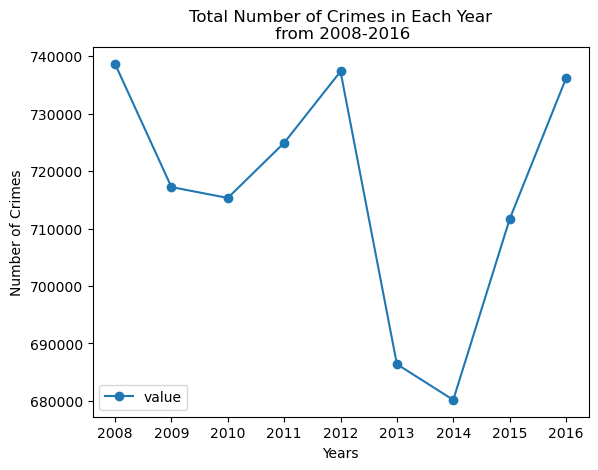

In [21]:
# Line plot
year_crime.plot(kind='line', marker="o")

plt.title("Total Number of Crimes in Each Year\n from 2008-2016")
plt.ylabel("Number of Crimes")
plt.xlabel("Years")
plt.show()

Berdasarkan line plot di atas, kasus kejahatan paling banyak terjadi pada tahun 2008, kemudian 2012, 2016, 2011, 2009, 2010, 2015, 2013, dan paling sedikit terjadi pada tahun 2014.

## Histogram

Kemudian kita lihat bagaimana catatan kasus kejahatan yang terjadi tiap tahunnya dari 2008 - 2016 berdasarkan "major_category"

In [22]:
# Data kasus kejahatan berdasarkan "major_category" sebagai kolom dengan index "year"
major_year = data_crime.pivot_table(values='value',
                        index=['year'],
                        columns=['major_category'],
                        aggfunc=np.sum,
                        fill_value=0)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\2506823633.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  major_year = data_crime.pivot_table(values='value',


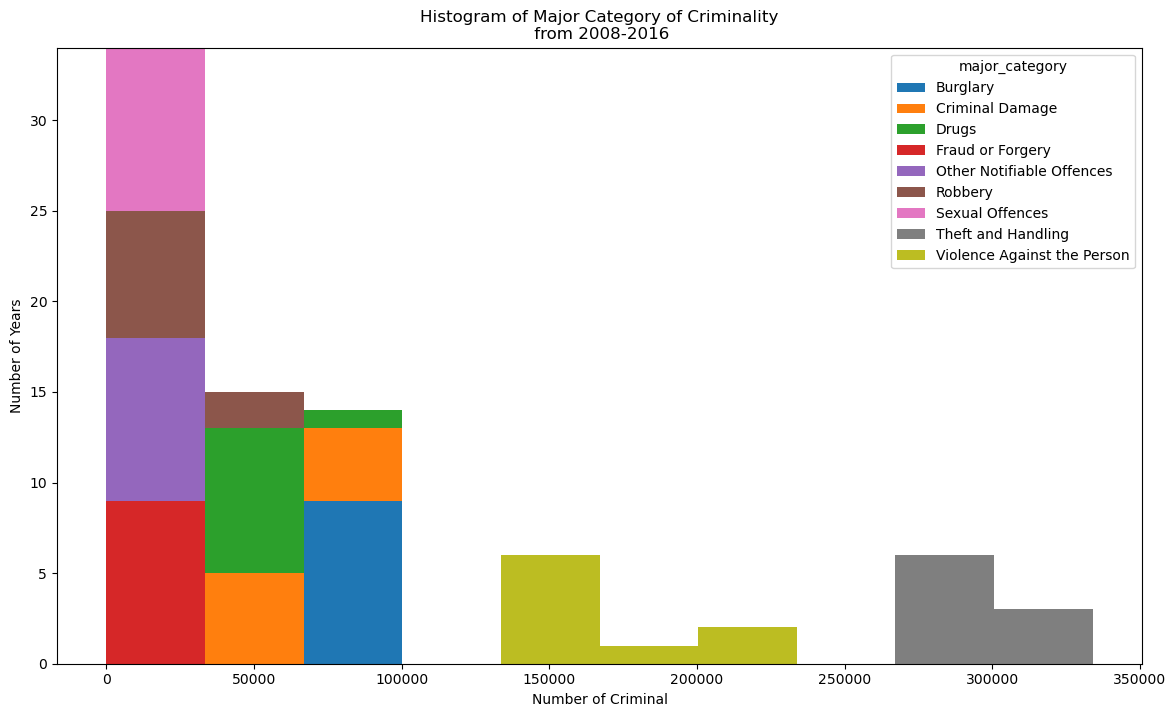

In [23]:
# Visualisasi dengan histogram
major_year.plot(kind='hist',
                figsize=(14,8), # ukuran figure
                stacked=True,
                alpha=1)

plt.title("Histogram of Major Category of Criminality\n from 2008-2016")
plt.ylabel("Number of Years")
plt.xlabel("Number of Criminal")
plt.show()

Berdasarkan histogram di atas, "Theft and Handling" memiliki catatan kasus kejahatan terbanyak, yaitu selama 9 tahun berada di antara 250000 dan 350000, diikuti dengan kasus kejahatan "Violence Against the Person".

Selanjutnya, ingin mengetahui banyaknya kasus kejahatan yang terjadi tiap tahunnya selama tahun 2008 - 2016, berdasarkan "major_category"
## Area Plot

In [24]:
# Data kasus kejahatan berdasarkan "major_category" sebagai kolom, dengan index "year"
crime_area = data_crime.pivot_table(values='value',
                        index=['year'],
                        columns=['major_category'],
                        aggfunc=np.sum,
                        fill_value=0)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\1096977380.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_area = data_crime.pivot_table(values='value',


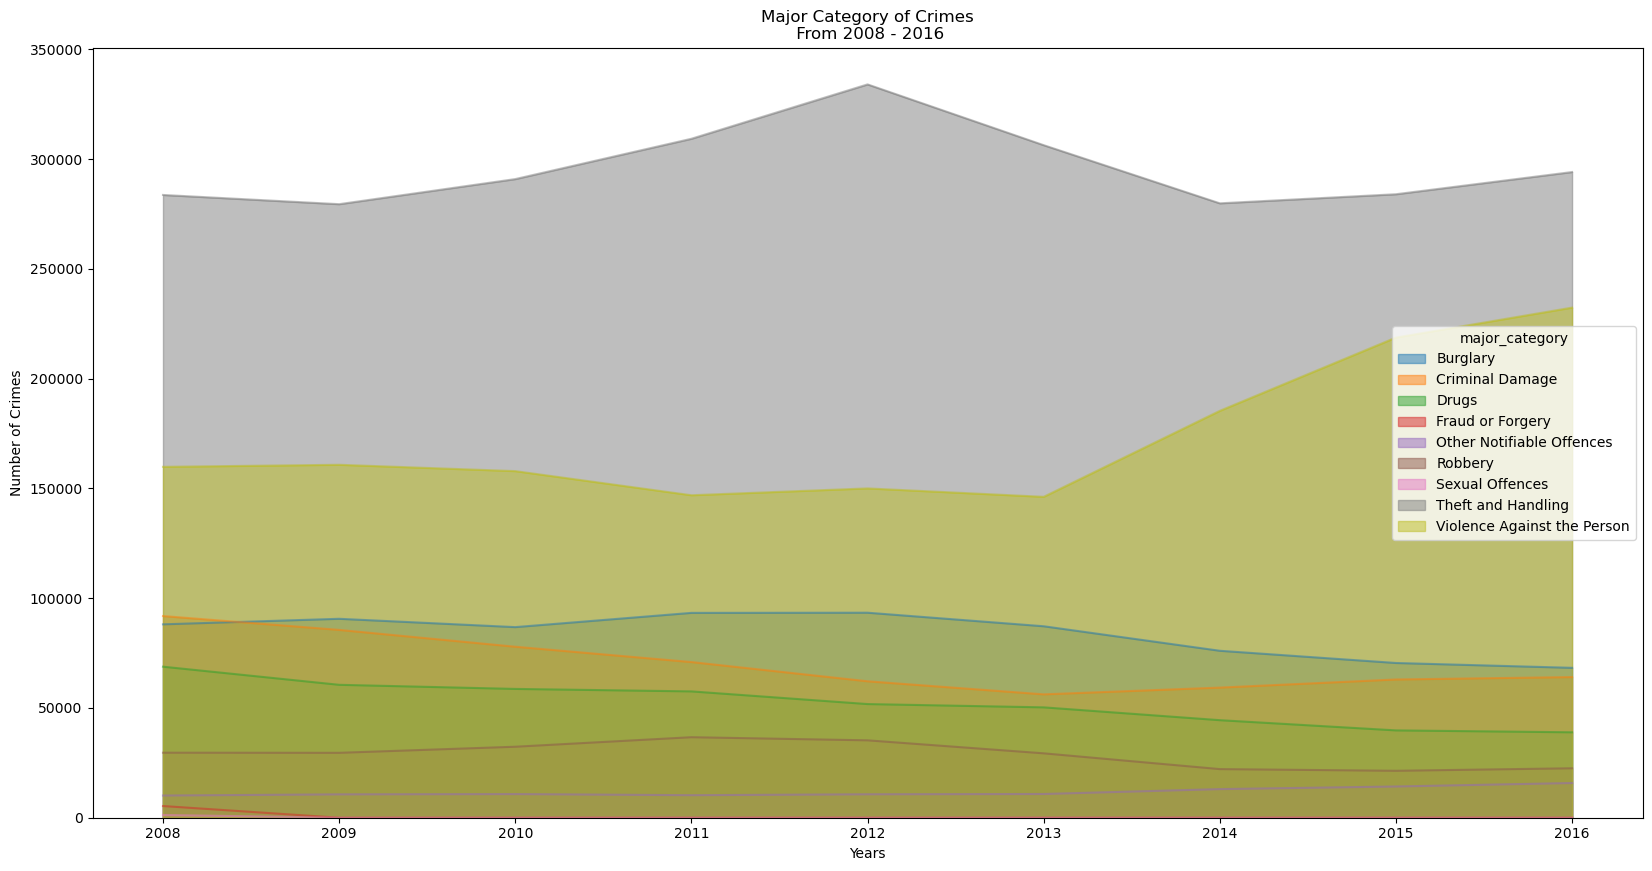

In [25]:
# Area plot dengan data crime_overtime
crime_area.plot(kind='area',
                alpha=0.5,
                figsize=(20,10),
                stacked=False)

plt.title('Major Category of Crimes\n From 2008 - 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

Seperti yang dapat kita lihat dari area plot di atas, perbandingan kasus kejahatan "Theft and Handing" dan "Violence Against the Person" yang jauh lebih luas (banyak) dibandingkan dengan kasus kejahatan lainnya.

# Which borough has the most crime cases?

In [26]:
# data dengan kolom "major_category" dan index "borough"
borough_crime = data_crime.pivot_table(values='value',
                       index=['borough'],
                      columns=['major_category'],
                       aggfunc=np.sum,
                       fill_value=0)
borough_crime.head()


C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\2782590162.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  borough_crime = data_crime.pivot_table(values='value',


major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091
Barnet,36981,21024,9796,175,2953,7374,38,87285,46565
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037
Brent,28923,20569,25978,157,3711,12473,39,72523,63178
Bromley,27135,24039,8942,196,2637,4868,31,69742,46759


## Bar Chart

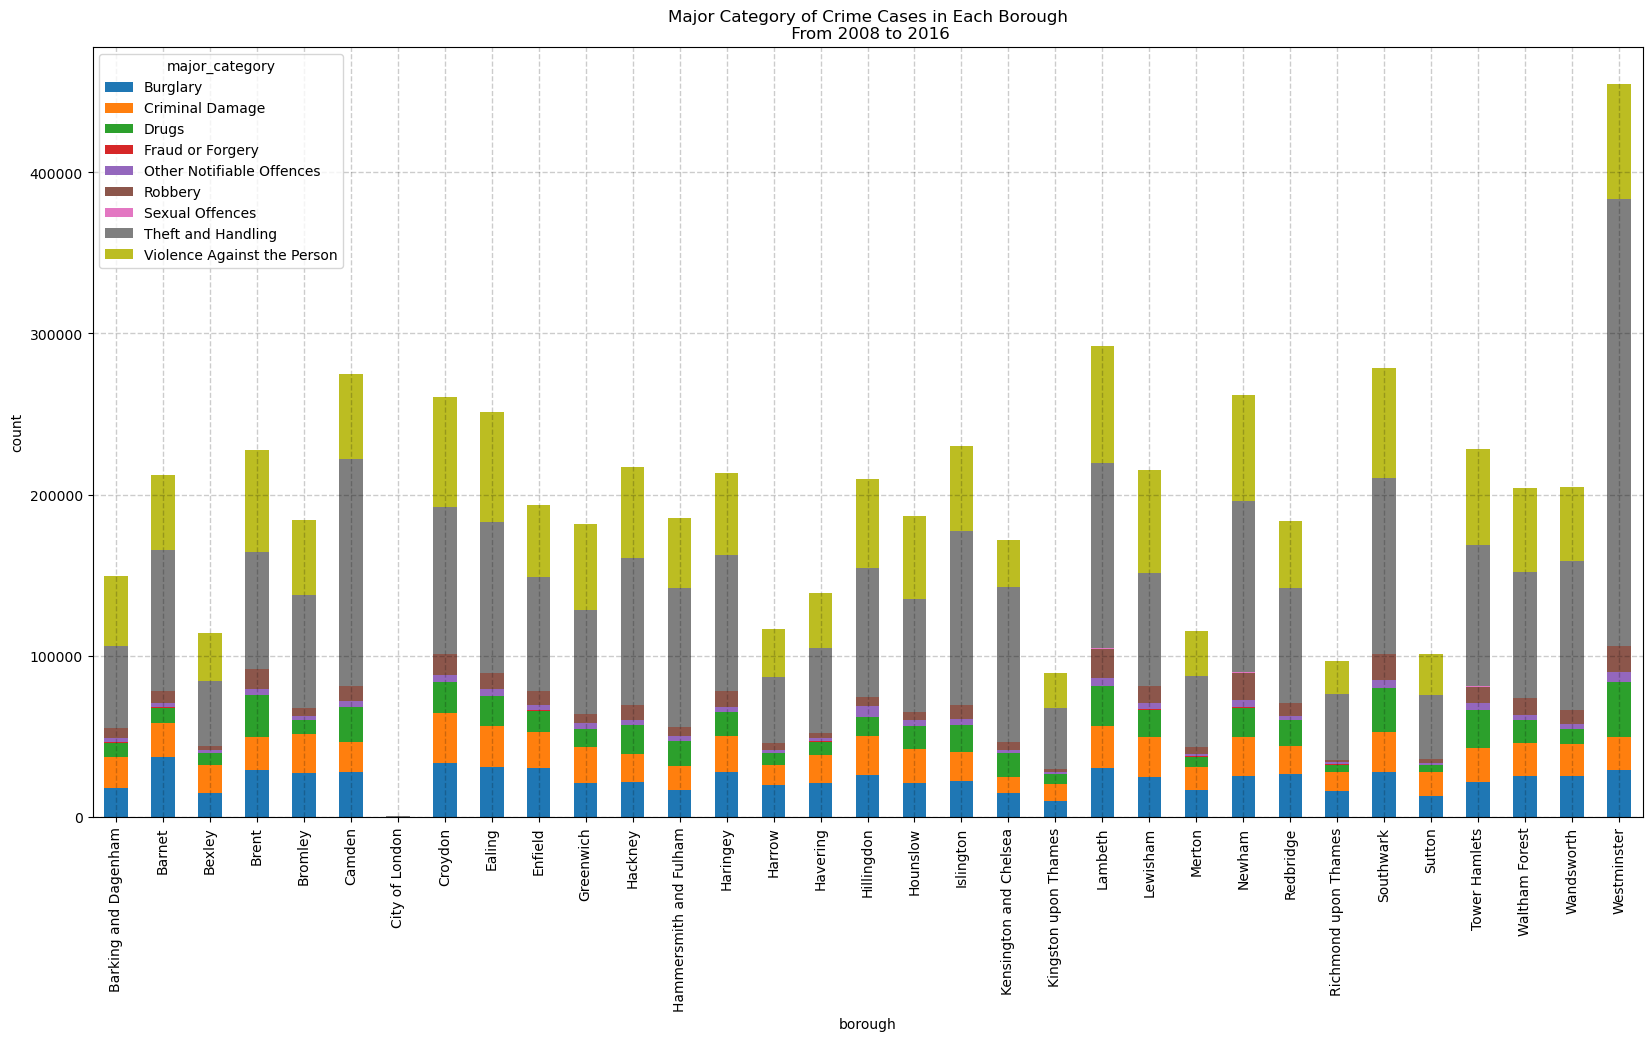

<function matplotlib.pyplot.show(close=None, block=None)>

In [27]:
# Bar plot dari data borough_crime
borough_crime.plot(kind="bar",stacked=True, figsize=(20,10))

plt.xticks(rotation=90)
plt.xlabel("borough")
plt.ylabel("count")
mpl.style.use(["ggplot"])   # theme style
plt.grid(color="black", linewidth=1, linestyle="dashed" ,axis="both", alpha=0.2)    # grid

plt.title("Major Category of Crime Cases in Each Borough\n From 2008 to 2016", fontsize=12, color="black")
plt.show()
plt.show

Berdasarkan bar plot di atas, 5 wilayah yang memiliki catatan kasus kriminalitas tertinggi adalah 
1. Westminster  
2. Lambeth
3. Southwark
4. Camden
5. Newham.

# What were the top 3 crimes that occur the most in Westminster?

Sebagai wilayah yang memiliki catatan kasus kejahatan tertinggi, kita ingin mengetahui 3 kejahatan yang paling banyak terjadi di Westminster sepanjang tahun 2008-2016

In [28]:
# Meng-copy data_crime menjadi datacrime
datacrime = data_crime.copy()

# Menjadikan "borough" sebagai index
datacrime.set_index("borough", inplace=True)
datacrime.head()

,lsoa_code,major_category,minor_category,value,year,month
borough,,,,,,
Croydon,E01001116,Burglary,Burglary in Other Buildings,0,2016,11
Greenwich,E01001646,Violence Against the Person,Other violence,0,2016,11
Bromley,E01000677,Violence Against the Person,Other violence,0,2015,5
Redbridge,E01003774,Burglary,Burglary in Other Buildings,0,2016,3
Wandsworth,E01004563,Robbery,Personal Property,0,2008,6


In [29]:
# Membuat pivot table dengan kolom "major_category"
westminster_crime = datacrime.pivot_table(values='value',
                       index=['borough'],
                      columns=['major_category'],
                       aggfunc=np.sum,
                       fill_value=0).sort_values('borough', ascending=False)

# Meng-copy westminster_crime dengan index "Westminster" menjadi westminster_crime 
westminster_crime = westminster_crime.loc['Westminster']

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\3614682332.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  westminster_crime = datacrime.pivot_table(values='value',


## Pie Chart

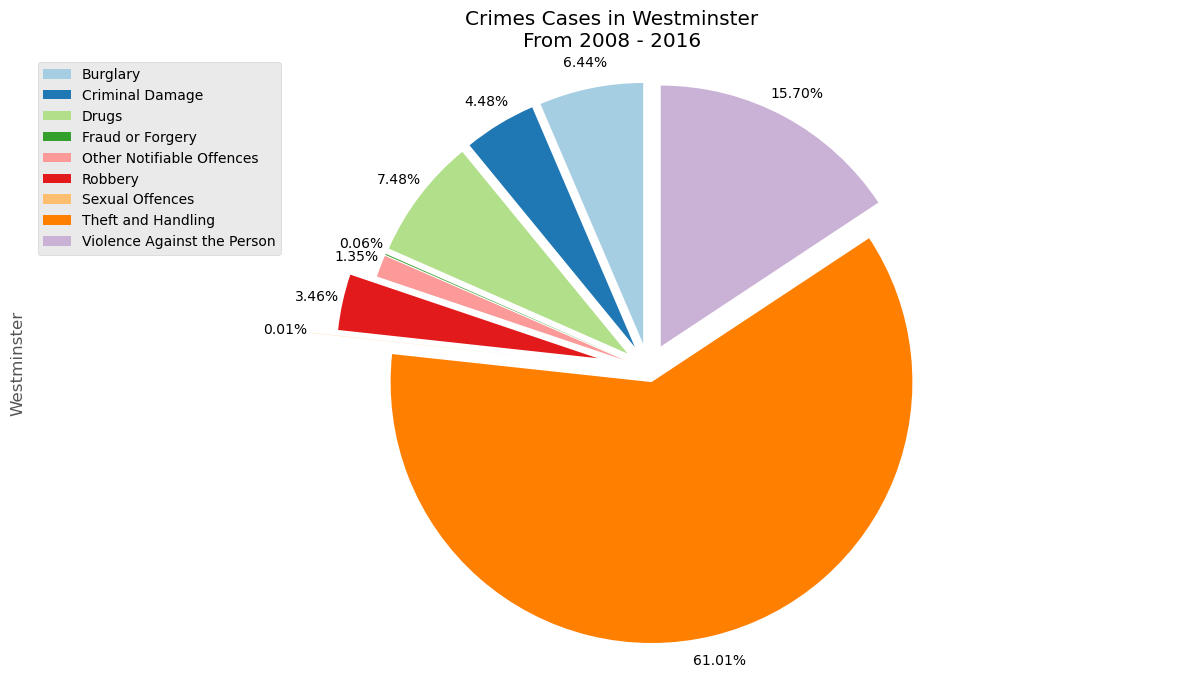

In [30]:
# mengatur jarak pada pie chart
explode_list=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.05, 0.1]

westminster_crime.plot(kind='pie',
                       figsize=(15, 8),
                       autopct='%1.2f%%',   # menjadikan percentage dengan 2 desimal di belakang koma
                       startangle=90,
                       pctdistance=1.1,
                       labels=None,
                       colors=sns.color_palette('Paired'),  # Menentukan color palette yang diinginkan
                       explode=explode_list
                       )

plt.title('Crimes Cases in Westminster\nFrom 2008 - 2016')
plt.axis('equal')
plt.legend(labels=westminster_crime.index, loc='upper left')

plt.show()

Berdasarkan pie chart di atas, kasus kejahatan yang paling banyak terjadi di wilayah Westminster sepanjang tahun 2008 - 2016 adalah:
1. Theft and Handling
2. Violence Against the Person
3. Drugs

# How is the trends of the Sum of Crime in Westminster troughtout the year of 2008-2016?

In [31]:
# Mendapatkan data dengan index 'Westminster' dan drop kolom 'minor_category','lsoa_code', dan 'major_category'
datacrime1 = pd.DataFrame(datacrime.loc['Westminster'])

In [32]:
data_westmy = datacrime1.copy()
data_westmy.drop(['minor_category','lsoa_code','major_category'], axis=1, inplace=True)
data_westmy.head()

,value,year,month
borough,,,
Westminster,0,2012,2
Westminster,0,2008,11
Westminster,0,2009,9
Westminster,1,2014,4
Westminster,0,2015,10


In [33]:
# Membuat pivot table dengan index "year" dan "month"
scatter_westmy = data_westmy.pivot_table(values='value',
                        index=['year','month'],
                        aggfunc=np.sum,
                        fill_value=0)
scatter_westmy.transpose()
scatter_westmy = scatter_westmy.reset_index()

# Mengubah keterangan bulan dari angka menjadi nama bulan 
scatter_westmy['month'] = pd.to_datetime(scatter_westmy['month'], format='%m').dt.month_name()
scatter_westmy.head()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\2949190564.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  scatter_westmy = data_westmy.pivot_table(values='value',


,year,month,value
0,2008,January,3957
1,2008,February,3880
2,2008,March,3896
3,2008,April,3725
4,2008,May,3849


## Scatter Plot

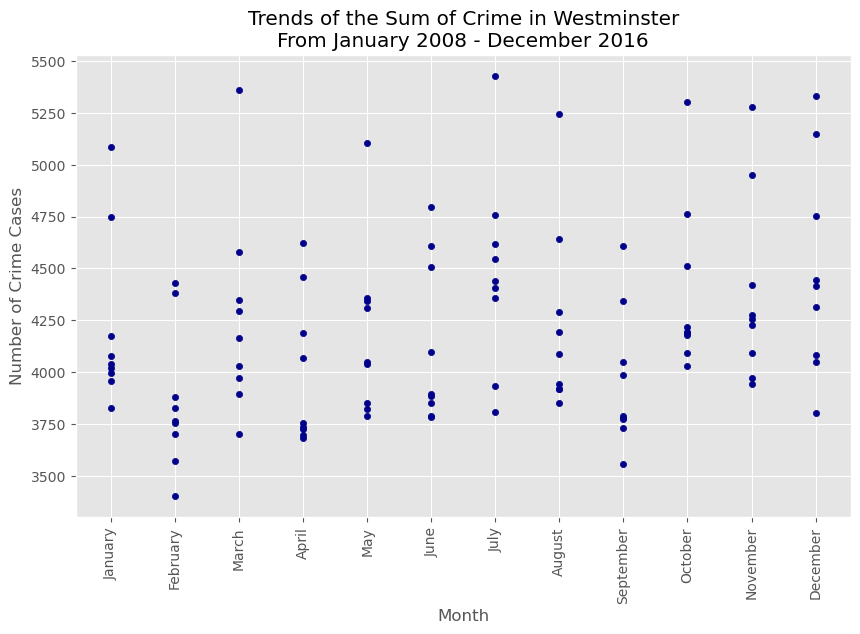

In [34]:
scatter_westmy.plot(kind='scatter', 
               x='month', 
                y='value', 
                figsize=(10,6),
                color='darkblue')

plt.xticks(rotation=90)
plt.title('Trends of the Sum of Crime in Westminster\nFrom January 2008 - December 2016')
plt.xlabel('Month')
plt.ylabel('Number of Crime Cases')

plt.show()

Seperti yang dapat kita lihat dari scatter plot di atas secara keseluruhan. Pada awal tahun, kasus kejahatan mengalami penurunan pada bulan Februari, yang kemudian mengalami kenaikan yang lumayan tinggi pada bulan Maret dan turun kembali pada bukan April. Setelahnya, trend ini mengalami naik dan turun, dengan titik tinggi di bulan July dan dua titik rendah di bulan September dan Desember

# How is the Theft and Handling Cases between 2008-2016 in Westminster?

In [35]:
crime_theft = datacrime1.copy()
crime_theft.drop(['lsoa_code','month'], axis=1, inplace=True) # menghapus kolom minor_category, lsoa_code dan month
crime_theft.head()

,major_category,minor_category,value,year
borough,,,,
Westminster,Theft and Handling,Handling Stolen Goods,0,2012
Westminster,Criminal Damage,Other Criminal Damage,0,2008
Westminster,Violence Against the Person,Wounding/GBH,0,2009
Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014
Westminster,Theft and Handling,Other Theft Person,0,2015


In [36]:
# Membuat pivot table dengan index "year" dan "month"
box_theft = crime_theft.pivot_table(values='value',
                        index=['major_category'],
                        columns=['year'],
                        aggfunc=np.sum,
                        fill_value=0)


box_theft = pd.DataFrame(box_theft.loc['Theft and Handling'])
box_theft


C:\Users\jasmi\AppData\Local\Temp\ipykernel_21824\810339744.py:2: FutureWarning: The provided callable <function sum at 0x000001C472E565C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  box_theft = crime_theft.pivot_table(values='value',


,Theft and Handling
year,
2008,29266
2009,29967
2010,29191
2011,33529
2012,38152
2013,33868
2014,28144
2015,27980
2016,27520


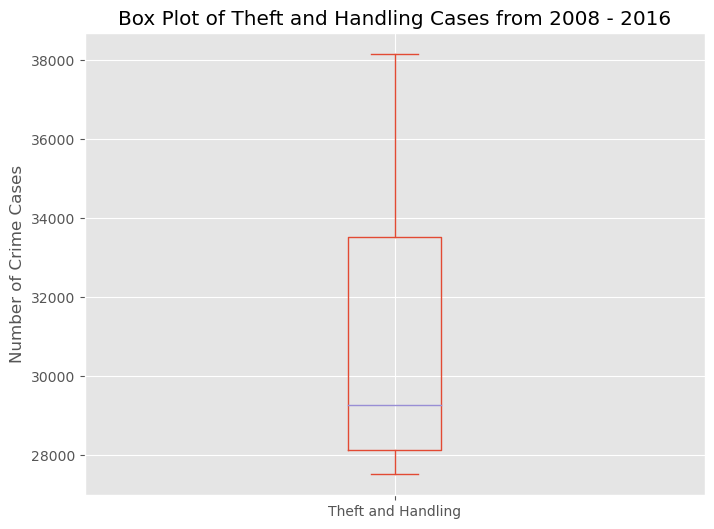

In [37]:
box_theft.plot(kind='box', figsize=(8, 6))
plt.title('Box Plot of Theft and Handling Cases from 2008 - 2016')
plt.ylabel('Number of Crime Cases')
plt.show()

Dari box plot di atas, dibuat beberapa observasi penting:
1. Jumlah minimum (minimum number) dari kasus "Theft and Handling" sekitar <28000 (min), jumlah maksimum (maximum number) sekitar 38000 (max), jumlah rata-rata (median number) sekitar 29000 (median).
2. 25% dari periode tahun 2008-2016 memiliki catatan kasus kejahatan sebanyak ~28000 atau kurang (First quartile)
3. 75% dari periode tahun 2008-2016 memiliki catatan kasus kejahatan sebanyak ~33000 atau kurang (Third quartile)


In [38]:
box_theft.describe()

,Theft and Handling
count,9.000000
mean,30846.333333
std,3575.851472
min,27520.000000
25%,28144.000000
50%,29266.000000
75%,33529.000000
max,38152.000000


## WordCloud 

Implementasi WordCloud dari major_category dan minor_category dari "Theft and Handling"

In [39]:
stopwords= set(STOPWORDS)

london_word = open("london_crimecategory.txt", 'r').read()
london_pic = np.array(Image.open("londonmap.PNG"))

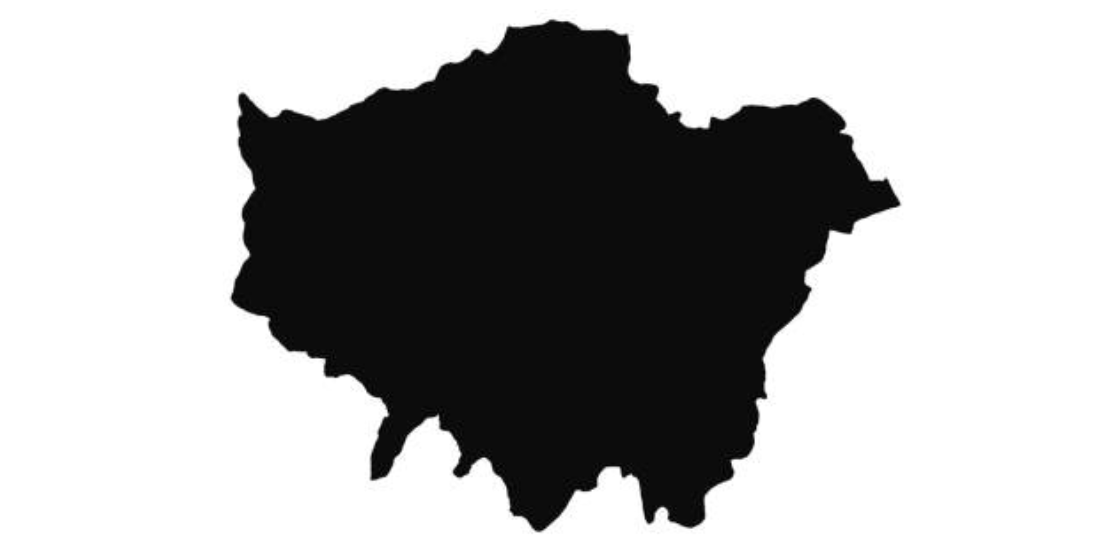

In [40]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_pic, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

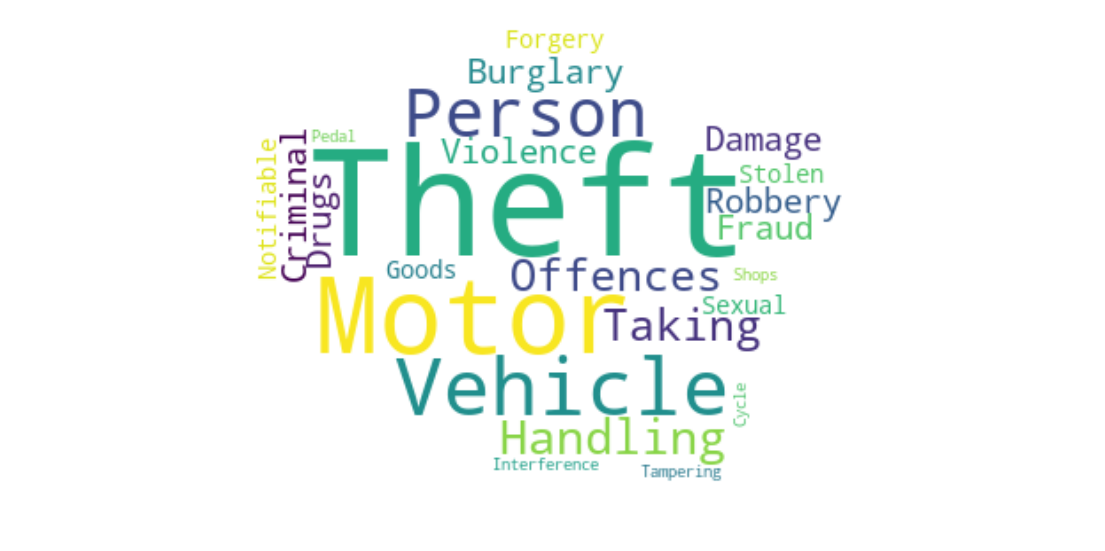

In [41]:
london_wc = WordCloud(background_color='white', max_words=2000, mask=london_pic, stopwords=stopwords)

london_wc.generate(london_word)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium Maps

In [42]:
import folium
from geopy.geocoders import Nominatim  # For Address --> lat & long
from time import sleep  # Add in delays

In [43]:
# Data borough beserta value-nya (jumlah catatan kejahatan)
maps_crime = (data_crime.groupby(['borough'])[['value']].agg('sum')).sort_values(
    by=['value'],
  ascending=False)
maps_crime = maps_crime.reset_index() # reset index
maps_crime.head()

,borough,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [44]:
# Create a geolocator object
geolocator = Nominatim(user_agent="explorer")

# Function to get the location of a London borough
def get_london_location(name):
    sleep(1)
    loc = geolocator.geocode(f"Borough of {name}, London, UK", timeout=500)
    if loc == None:
        sleep(1)
        loc = geolocator.geocode(f"{name}, London, UK")
    print(name)
    return loc.latitude, loc.longitude

# Extract the lat and long for each location

locations = maps_crime["borough"].apply(lambda name: get_london_location(name))


Westminster
Lambeth
Southwark
Camden
Newham
Croydon
Ealing
Islington
Tower Hamlets
Brent
Hackney
Lewisham
Haringey
Barnet
Hillingdon
Wandsworth
Waltham Forest
Enfield
Hounslow
Hammersmith and Fulham
Bromley
Redbridge
Greenwich
Kensington and Chelsea
Barking and Dagenham
Havering
Harrow
Merton
Bexley
Sutton
Richmond upon Thames
Kingston upon Thames
City of London


In [45]:
# Menambahkan latitude dan longitude menjadi kolom di maps_crime
maps_crime["latitude"], maps_crime["longitude"] = list(zip(*locations))
maps_crime.head()

,borough,value,latitude,longitude
0,Westminster,455028,51.514196,-0.113477
1,Lambeth,292178,51.466660,-0.096867
2,Southwark,278809,51.505182,-0.099939
3,Camden,275147,51.520843,-0.108812
4,Newham,262024,51.539286,-0.008253


In [46]:
borough_geo = r"london_boroughs.geojson" 

# Created a map that is focused on London
practical_map = folium.Map(location=[51.509865, -0.118092], zoom_start=10, min_zoom=10, tiles=None, overlay=False)

borough_markers = folium.FeatureGroup(name="Borough markers",)  # Create a borough marker group

# For each borough, add a marker with the borough name
for lat, lng, borough in zip(maps_crime['latitude'], maps_crime['longitude'],
                             maps_crime['borough']):
    
    pop = folium.Popup(f"{borough}", parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=pop,
        color='blue',
        fill=True,
        fill_color='#66023c',
        fill_opacity=0.7,
        parse_html=False).add_to(borough_markers)

In [47]:

folium.Choropleth(geo_data = borough_geo,
                  data = maps_crime,
                  columns = ["borough", "value"],
                  key_on = 'feature.properties.name',
                  fill_color = 'YlOrRd', 
                  fill_opacity = 0.5, 
                  line_opacity = 0.4,
                  legend_name = "Crime Cases in Boroughs of London",
                  name="Crime Cases in Boroughs of London",
                  overlay=False,
                  show=False).add_to(practical_map)

# Add the marker feature group to the map
borough_markers.add_to(practical_map)

# Add map tiles in as a toggleable feature
folium.TileLayer('OpenStreetMap',overlay=True,name="Map tiles").add_to(practical_map)
    
# Add layer controls to the map
folium.LayerControl().add_to(practical_map)

practical_map

# Overall Analysis

Berdasarkan analisa dan visualisasi yang telah dilakukan, dapat diketahui beberapa hal, yaitu:

- Kasus kejahatan paling banyak terjadi pada tahun 2008, kemudian 2012, 2016, 2011, 2009, 2010, 2015, 2013, dan terendah pada tahun 2014.
- Berdasarkan data tahun 2008 - 2016, kejahatan dalam kategori major yang paling banyak terjadi adalah "Theft and Handling".
- 5 Wilayah dengan catatan kasus kejahatan tertinggi dalam periode tahun 2008 - 2016 adalah "Westminster", "Lambeth", "Southwark", "Camden", dan "Newham".
- Westminster merupakan wilayah dengan catatan kasus kejahatan tertinggi, dengan 3 kejahatan teratas adalah "Theft and Handling", "Violence Against the Person", dan "Drugs".
- Secara keseluruhan catatan kasus kejahatan di "Westminster" tahun 2008 - 2016, kasus kejahatan mengalami penuruhan pada bulan Februari, April, September dan Desember. Dan mengalami kenaikan pada bulan April dan July.
- Kasus kejahatan dalam kategori major "Theft and Handling" memiliki jumlah minimum sekitar <28000, jumlah maksimum sekitar 30000, dan jumlah rata-rata sekitar 29000 kasus tiap tahunnya (2008 - 2016).

## Kesimpulan

Maka, tingkat keamanan untuk wilayah Westminster harus lebih ditingkatkan, terlebih pada bulan April dan July. Kemudian, fokus penanganan keamanan untuk kategori kasus kejahatan major "Theft and Handling", "Violence Against the Person", dan "Drugs" juga harus lebih ditingkatkan.
